In [75]:
from preprocess import json_to_df
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### 1. **Разучаване на модели, базирани на архитектурата Трансформър. Докладване на съществуващи характеристики на тези модели и от какво се състоят те.**

#### Характеристики на моделите, базирани на Трансформър:
1. Tokenization
2. Self attention
3. Encoder
4. Decoder
5. Positional encoding
6. Transformer block
7. Attention component
###

1. **Механизми за внимание (Attention Mechanisms):**
   - Използват self-attention,  което позволява на модела да анализира връзките между всички думи в изречението едновременно, вместо последователно.

2. **Позиционно кодиране (Positional Encoding):**
   - Тъй като Трансформърът не използва рекурентни или конволюционни слоеве, той добавя информация за позицията на думите чрез позиционно кодиране.

3. **Многослойни енкодери и декодери (Multi-layer Encoders and Decoders):**
   - Моделът се състои от множество еднакви слоеве, всеки от които има два основни компонента:
     - **Multi-Head Self-Attention**: Позволява на модела да се фокусира върху различни части на входа едновременно.
     - **Feed-Forward Neural Network**: Обработва изхода от attention механизма.

4. **Паралелна обработка:**
   - За разлика от рекурентните мрежи, Трансформърът обработва целия входен текст паралелно, което го прави по-бърз и ефективен.

#### Популярни модели, базирани на Трансформър:
- BERT (Bidirectional Encoder Representations from Transformers)
- GPT (Generative Pre-trained Transformer)
- LaMDA (Language Model for Dialogue Applications)
***



### 2. **Документиране на трите типа Question Answering задачи - Extractive QA, Abstractive QA, Open-Domain QA. Какво представляват? По какво си приличат и по какво се различават?**

#### Extractive QA:
  - Extracts answers directly from the documents by highlighting the span of text that makes up the answer
- **Pros:**
  - Factual accuracy: They provide factual answers that you can easily verify because they're highlighted directly in the source.
  - Efficiency: Extractive QA systems are often more computationally efficient compared to generative QA systems. 
  - Handling large volumes of text: These systems are well-suited for handling and extracting answers from long documents.
  - Ability to fine-tune the model: The models used in extractive QA systems are relatively small, and it's easy to train them on your own data.
- **Cons:**
  - Struggles with questions that require synthesizing information or generating answers not directly stated in the document text.
  - Performs best on textual documents (struggles with different format).
  - Heavily depends on the quallity of the source.

#### Abstractive QA:
  - Generates an answer to a given question in natural language by summarizing and synthesizing information from various sources, rather than just selecting an answer from pre-existing text.
- **Pros:**
  - Human-like responses: produces responses that go beyond mere extraction and can provide concise summary or paraphrased explanation.
  - Flexibility: Abstractive models can handle a wide range of questions and contexts, making them adaptable to diverse scenarios.
- **Cons:** 
  - Achieving good performance often requires substantial computational resources. (Requires large datasets and more complex architectures).
  - Can generate incorrect informaiton. 

### Open-Domain QA:  
- Open-domain Question Answering (QA) retrieves answers from a vast and unstructured collection of documents, rather than a predefined or limited set of sources. It typically involves both document retrieval and answer extraction/generation.  
- **Pros:**  
  - No need for predefined knowledge sources: Can answer questions using publicly available information, making it highly scalable.  
  - Handles diverse topics: Works across multiple domains without requiring extensive retraining.  
  - Combines retrieval & generation: Can leverage both extractive and abstractive techniques to provide answers.  

- **Cons:**  
  - Dependency on retrieval quality: The system's performance is limited by the accuracy and relevance of the retrieved documents.  
  - Computationally intensive: Requires searching large-scale document collections and processing vast amounts of text.  
  - Potential for misinformation: Can retrieve outdated, biased, or incorrect sources, leading to inaccurate answers.

#### Similarities and differences:
- **Similarities:**
  - All are forms of Question Answering (QA): They aim to provide answers to user queries based on textual information.
  - Require high-quality data: The effectiveness of each QA system depends on the quality and availability of training data and source documents.
  - Used in Transformer-based architectures.
- **Differences:**
  - Answer generation: all 3 generate answers in a different manner.
  - Source scope: Extractive and Abstractive QA are limited to a specific document.
  - Accuracy: All 3 have different levels of accuracy with Extractive having the highest.
  - Computational cost: Retrieving, processing and generating text require differing levels computational resources.
  - Flexibility: Extractive is the least flexible while Open-Domain is the most.
  - Risk of hallucination - generating text can lead to a hallucination.

### Анализ на зависимостите в набора от данни, илюстриран с подходящи визуализации с pandas, matplotlib и seaborn. Да се създадат поне 5 графики, придружени с коментари.

In [76]:
df = json_to_df()
df.head()

,Title,Context,Question,Answer,Is_Impossible
0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,in the late 1990s,False
1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,singing and dancing,False
2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,2003,False
3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"Houston, Texas",False
4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,late 1990s,False


Since SQuAD1.1 contains 100,000 answerable questions and SQuAD2.0 combines them with 50,000 unanswerable ones the ratio shows that we've properly converted the data.

### Visualizing the Context 

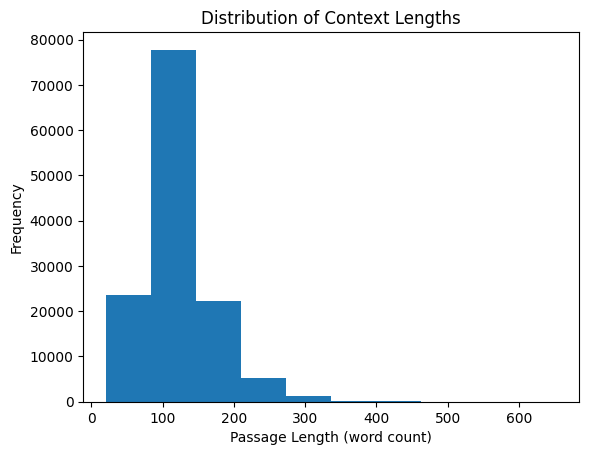

In [95]:
context = [len(context.split()) for context in df['Context']]

plt.hist(context)
plt.title('Distribution of Context Lengths')
plt.xlabel('Passage Length (word count)')
plt.ylabel('Frequency')
plt.show()

We can see that the majority of the passages contain less than 200 words so let's see the spread at that range.

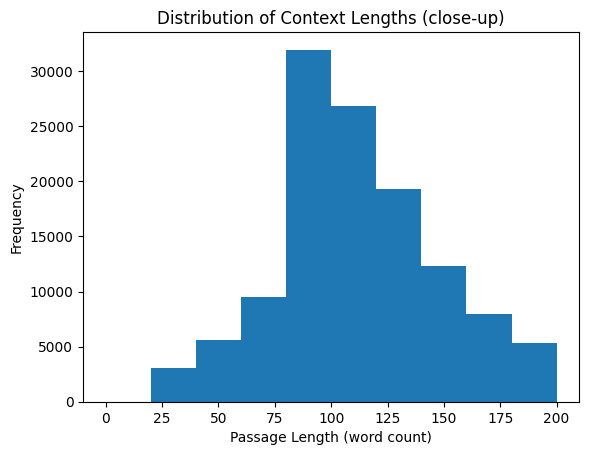

In [96]:
context = [len(context.split()) for context in df['Context']]

plt.hist(context, range=(0, 200))
plt.title('Distribution of Context Lengths (close-up)')
plt.xlabel('Passage Length (word count)')
plt.ylabel('Frequency')
plt.show()

The majority of the passages word count is arount 100 with a normal-like spread skewed to the right.

### Visualizing the Questions

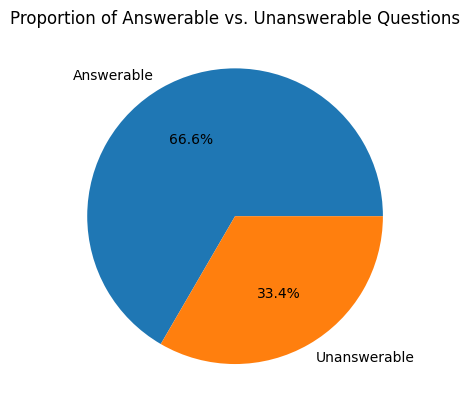

In [89]:
unanswerable = sum(df['Is_Impossible'] == True)
answerable = sum(df['Is_Impossible'] == False)

labels = ['Answerable', 'Unanswerable']
sizes = [answerable, unanswerable]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Answerable vs. Unanswerable Questions')
plt.show()

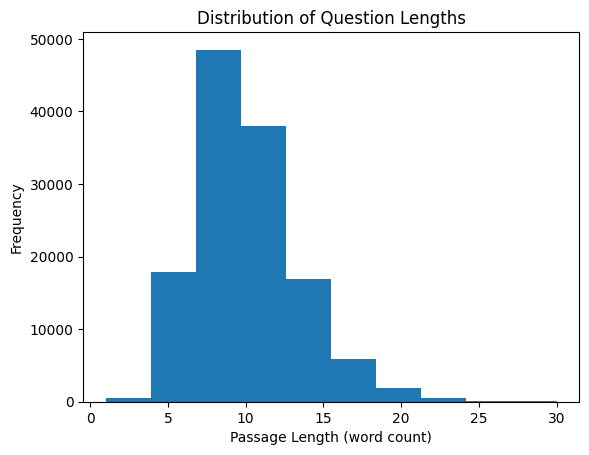

In [97]:
context = [len(context.split()) for context in df['Question']]

plt.hist(context, range=(1, 30))
plt.title('Distribution of Question Lengths')
plt.xlabel('Passage Length (word count)')
plt.ylabel('Frequency')
plt.show()

We can see that the spread of the context lengths follows a normal-like distribution.

### Visualizing the Answers

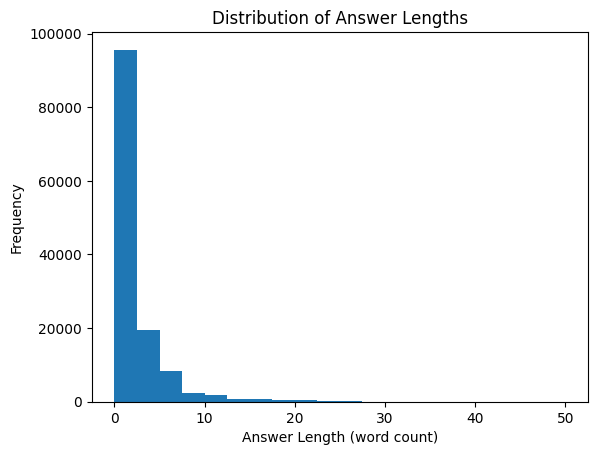

In [98]:
answer_lengths = [len(answer.split()) for answer in df['Answer']]

plt.hist(answer_lengths, range=(0, 50), bins=20)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (word count)')
plt.ylabel('Frequency')
plt.show()

The high skewness to the left makes sense since 1/3 of the answers have a length of 0 (unanswerable). 

Let's explore the distribution when we exclude the unanswerable questions:

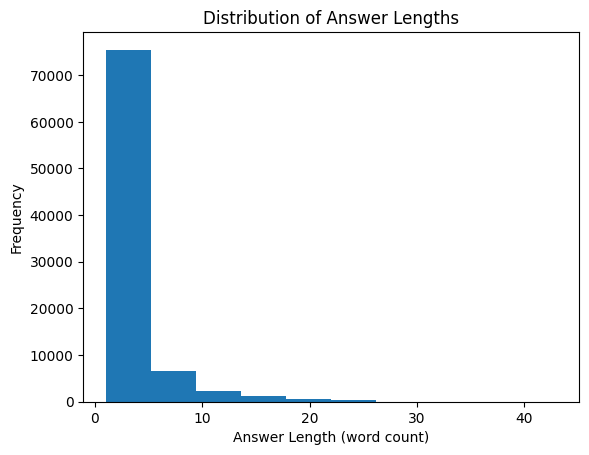

In [101]:
df_filtered = df[df['Answer'].str.len() > 0]

answer_lengths = [len(answer.split()) for answer in df_filtered['Answer']]

plt.hist(answer_lengths)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (word count)')
plt.ylabel('Frequency')
plt.show()

zooming in we get:

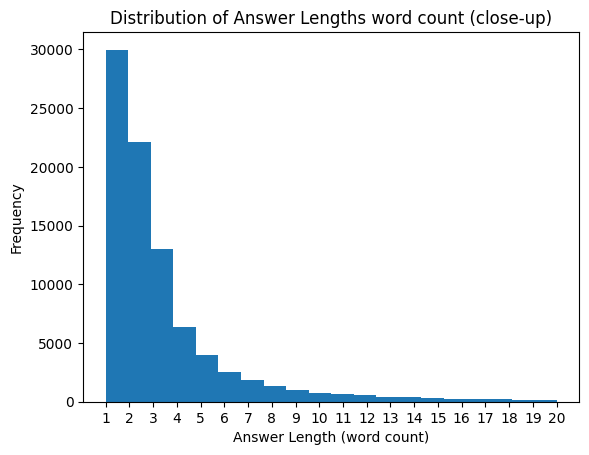

In [105]:
num_words = [len(answer.split()) for answer in df_filtered['Answer']]

plt.hist(num_words, range=(1, 20), bins=20)
plt.title('Distribution of Answer Lengths word count (close-up)')
plt.xlabel('Answer Length (word count)')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 21))
plt.show()

We can see that the majority of the answers contain less than 5 words.

## Missing values

In [84]:
print(df.isna().sum().sort_values(ascending=False))

Title            0
Context          0
Question         0
Answer           0
Is_Impossible    0
dtype: int64


In [85]:
print(f"Number of unique topics (titles): {df['Title'].nunique()}")

Number of unique topics (titles): 442
